## Prepare dataset

In [ ]:
# Import all the libraries
import os
from os.path import join
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from zipfile import ZipFile
import numpy as np

In [ ]:
# connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dowmload wikiart
!wget http://web.fsktm.um.edu.my/~cschan/source/ICIP2017/wikiart.zip

--2022-11-12 06:06:01--  http://web.fsktm.um.edu.my/~cschan/source/ICIP2017/wikiart.zip
Resolving web.fsktm.um.edu.my (web.fsktm.um.edu.my)... 103.18.2.145
Connecting to web.fsktm.um.edu.my (web.fsktm.um.edu.my)|103.18.2.145|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27301958850 (25G) [application/zip]
Saving to: ‘wikiart.zip’

wikiart.zip         100%[===================>]  25.43G  30.3MB/s    in 14m 33s 

2022-11-12 06:20:35 (29.8 MB/s) - ‘wikiart.zip’ saved [27301958850/27301958850]



In [ ]:
# decompressing wikiart.zip
with ZipFile('wikiart.zip','r') as zip:
   zip.extractall()
   print('Data decompressed successfully')

# removing the .zip file after extraction to clean space
!rm wikiart.zip

BadZipFile: ignored

In [ ]:
!rm wikiart.zip

In [ ]:
#download set0
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tCzYTnQIqLdH-B1FR8yqGiR69LekOwvY' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1tCzYTnQIqLdH-B1FR8yqGiR69LekOwvY" -O set0.zip && rm -rf /tmp/cookies.txt

# decompressing the data
with ZipFile('set0.zip','r') as zip:
   zip.extractall()
   print('Data decompressed successfully')

# removing the .zip file after extraction to clean space
!rm set0.zip

--2022-11-12 06:22:23--  https://docs.google.com/uc?export=download&confirm=t&id=1tCzYTnQIqLdH-B1FR8yqGiR69LekOwvY
Resolving docs.google.com (docs.google.com)... 172.217.194.102, 172.217.194.139, 172.217.194.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.194.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-3g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0tt3mg1c0qqd88876feqbdjjfij0ejc2/1668234075000/11301297338463212034/*/1tCzYTnQIqLdH-B1FR8yqGiR69LekOwvY?e=download&uuid=c0343471-f74f-4220-a0a9-b0e859cbdcea [following]
--2022-11-12 06:22:24--  https://doc-0o-3g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0tt3mg1c0qqd88876feqbdjjfij0ejc2/1668234075000/11301297338463212034/*/1tCzYTnQIqLdH-B1FR8yqGiR69LekOwvY?e=download&uuid=c0343471-f74f-4220-a0a9-b0e859cbdcea
Resolving doc-0o-3g-docs.googleusercontent.com (doc-0o-3g-docs.googleusercontent.com)... 74.125.130.1

In [ ]:
# decompressing every files
set_0_path = "Set0_Micro"
for p in os.listdir(set_0_path):
  with ZipFile(join(set_0_path, p),'r') as zip:
   zip.extractall(set_0_path)
   print(f'{p} decompressed successfully !')
   p = join(set_0_path, p)
   !rm $p

BRD_Micro.zip decompressed successfully !
PLK_Micro.zip decompressed successfully !
PLT_VIL_Micro.zip decompressed successfully !
CRS_Micro.zip decompressed successfully !
BCT_Micro.zip decompressed successfully !
MD_MIX_Micro.zip decompressed successfully !
RESISC_Micro.zip decompressed successfully !
SPT_Micro.zip decompressed successfully !
FLW_Micro.zip decompressed successfully !
TEX_Micro.zip decompressed successfully !


## Check the datasets

In [ ]:
set_path = "Set0_Micro"
#load csv to access data information
data = pd.read_csv(join(set_path, "SPT_Micro", "labels.csv"))
data.head(5) #show the 5 first rows

,FILE_NAME,CATEGORY,SUPER_CATEGORY
0,95861.jpg,snow boarding,NaN
1,84568.jpg,horse racing,NaN
2,171894.jpg,giant slalom,NaN
3,191579.jpg,hurdles,NaN
4,160133.jpg,hurdles,NaN


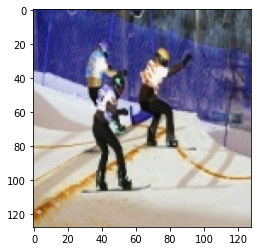

In [ ]:
#example on how to load and plot one image for a given dataset
im_path = join(set_path, "SPT_Micro", "images")
im = cv2.imread(join(im_path, data["FILE_NAME"][0]))
plt.imshow(im)

In [ ]:
styles = os.listdir("wikiart")

art_data = {}

#We just save the path of each image for each style
for f in styles:
  list_images = [join("wikiart", f, ff) for ff in os.listdir(join("wikiart", f))]
  art_data[f] = list_images

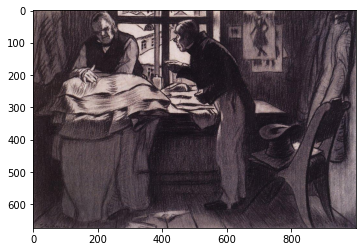

In [ ]:
img = cv2.imread(art_data['Realism'][1])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

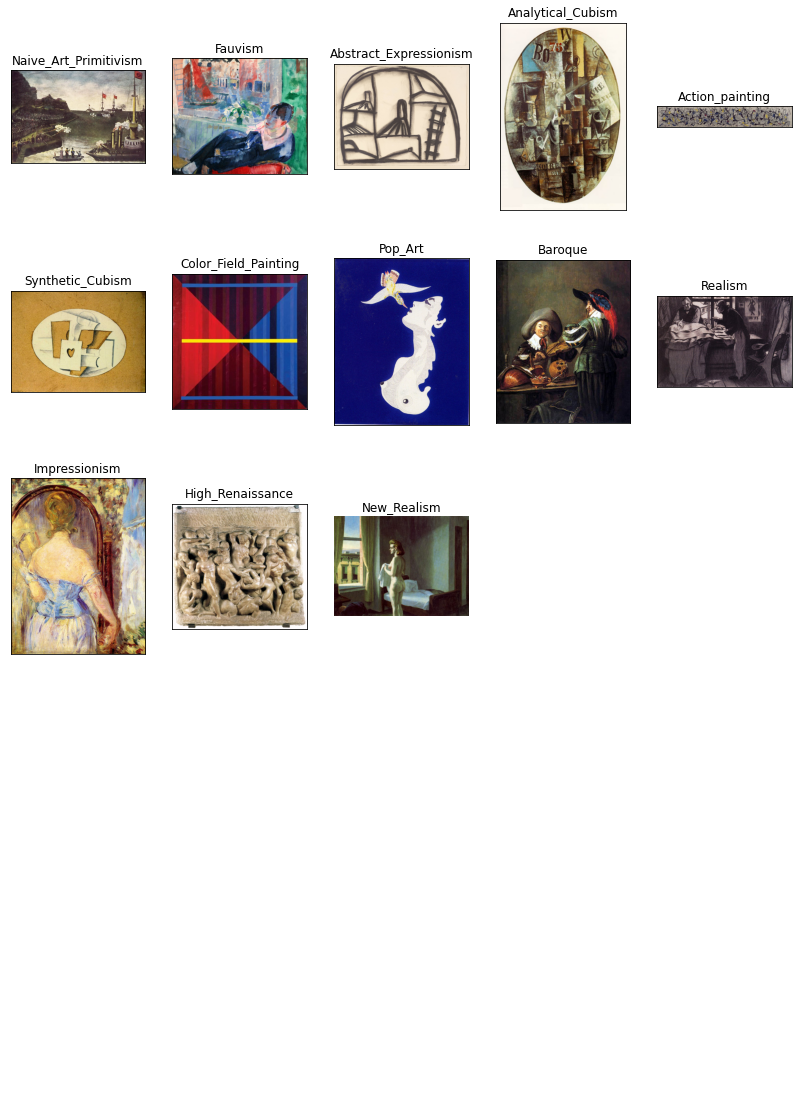

In [ ]:
fig, axs = plt.subplots(5, 5, figsize = (14,20))

axs = axs.flatten()
keys = list(art_data.keys()) 

for i, k in enumerate(keys):
  img = cv2.imread(art_data[k][1])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  axs[i].imshow(img)
  axs[i].set_title(k)
  axs[i].axes.get_xaxis().set_visible(False)
  axs[i].axes.get_yaxis().set_visible(False)

for ax in axs[5*5-len(keys):]:
  ax.set_axis_off()

## Select Styles


In [ ]:
# Calculate image_colorfulness

def image_colorfulness(image): 
    # split image into B,G,R three parts
    (B, G, R) = cv2.split(image.astype("float")) 

    #rg = R - G
    rg = np.absolute(R - G) 

    #yb = 0.5 * (R + G) - B
    yb = np.absolute(0.5 * (R + G) - B) 

    # calculate mean and std of rg and yb
    (rbMean, rbStd) = (np.mean(rg), np.std(rg)) 
    (ybMean, ybStd) = (np.mean(yb), np.std(yb)) 

    # calculate mean and std of rgyb
    stdRoot = np.sqrt((rbStd ** 2) + (ybStd ** 2))
    meanRoot = np.sqrt((rbMean ** 2) + (ybMean ** 2)) 

    # return colorfulness score
    return stdRoot + (0.3 * meanRoot)



colorfulness score: 47.32176542693044


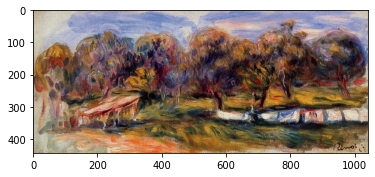

In [ ]:
# Example of image_colorfulness function
img = cv2.imread(art_data['Impressionism'][0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
print('colorfulness score:',image_colorfulness(img))

In [ ]:
# calculate score of every images
style_path = './wikiart'
styles = ["Fauvism", "Realism", "Action_painting"]

colorscore_df = pd.DataFrame(columns = ['style','image_name','colorfulness_score'])
for s in styles:
    img_list = [os.path.join(nm) for nm in os.listdir(os.path.join(style_path,s)) if nm[-3:] in ['jpg']]
    print(s,'done')
    for i in img_list:
        path = os.path.join(style_path,s,i)
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        colorfulness_score = image_colorfulness(img)
        colorscore_df.loc[len(colorscore_df)] = [s,i,colorfulness_score]

Fauvism done
Realism done
Action_painting done


In [ ]:
# check the result
colorscore_df

,style,image_name,colorfulness_score
0,Fauvism,georges-braque_the-harbor-1906.jpg,70.029532
1,Fauvism,rik-wouters_afternoon-in-amsterdam-1915.jpg,50.205637
2,Fauvism,august-macke_donkey-rider.jpg,58.695475
3,Fauvism,walasse-ting_red-parrot-green-parrot.jpg,102.001556
4,Fauvism,henri-matisse_portrait-of-madame-matisse-green...,60.845448
...,...,...,...
11760,Action_painting,jackson-pollock_convergence-1952.jpg,76.587932
11761,Action_painting,walasse-ting_goya-s-lover-1977.jpg,89.851985
11762,Action_painting,norman-bluhm_untitled-1959.jpg,48.150539
11763,Action_painting,walasse-ting_it-is-very-hot-here-1986.jpg,109.287574


In [ ]:
colorscore_Fauvism_df = colorscore_df[colorscore_df['style']== "Fauvism"]
colorscore_Realism_df = colorscore_df[colorscore_df['style']== "Realism"]
colorscore_Action_painting_df = colorscore_df[colorscore_df['style']== "Action_painting"]

In [ ]:
colorscore_Fauvism_df.sort_values(by='colorfulness_score').iloc[int(len(colorscore_Fauvism_df)/2):int(len(colorscore_Fauvism_df)/2)+1].index.tolist()[0] 

194

In [ ]:
from pathlib import Path  
filepath = Path('./drive/MyDrive/Output/colorfulness.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
colorscore_df.to_csv(filepath)  


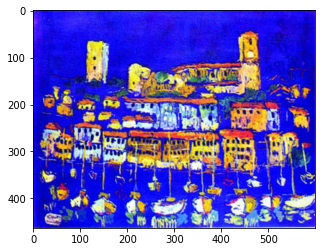

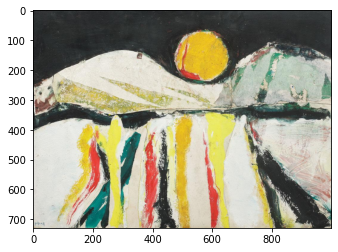

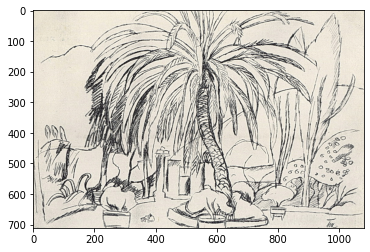

In [ ]:
# style Fauvism highest score and lowest score image

img1 = cv2.imread(os.path.join(style_path,'Fauvism',colorscore_df.iloc[colorscore_Fauvism_df.sort_values(by='colorfulness_score').iloc[-1:].index.tolist()[0] ,1]))
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()

img2 = cv2.imread(os.path.join(style_path,'Fauvism',colorscore_df.iloc[colorscore_Fauvism_df.sort_values(by='colorfulness_score').iloc[int(len(colorscore_Fauvism_df)/2):int(len(colorscore_Fauvism_df)/2)+1].index.tolist()[0] ,1]))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

img3 = cv2.imread(os.path.join(style_path,'Fauvism',colorscore_df.iloc[colorscore_Fauvism_df.sort_values(by='colorfulness_score').iloc[0:1].index.tolist()[0],1]))
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

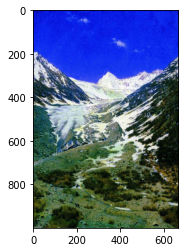

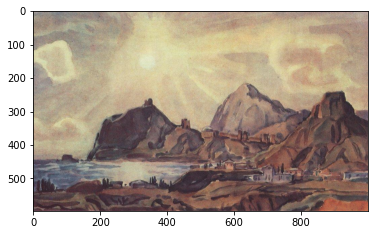

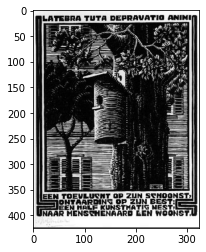

In [ ]:
# style Realism highest score and lowest score image


img4 = cv2.imread(os.path.join(style_path,'Realism',colorscore_df.iloc[colorscore_Realism_df.sort_values(by='colorfulness_score').iloc[-1:].index.tolist()[0] ,1]))
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
plt.imshow(img4)
plt.show()

img5 = cv2.imread(os.path.join(style_path,'Realism',colorscore_df.iloc[colorscore_Realism_df.sort_values(by='colorfulness_score').iloc[int(len(colorscore_Realism_df)/2):int(len(colorscore_Realism_df)/2)+1].index.tolist()[0] ,1]))
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
plt.imshow(img5)
plt.show()

img6 = cv2.imread(os.path.join(style_path,'Realism',colorscore_df.iloc[colorscore_Realism_df.sort_values(by='colorfulness_score').iloc[0:1].index.tolist()[0],1]))
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)
plt.imshow(img6)
plt.show()

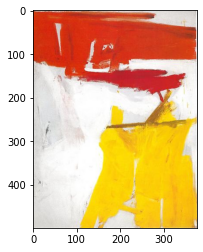

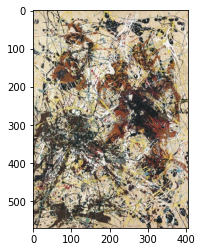

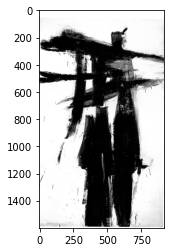

In [ ]:
# style Action_painting highest score and lowest score image

img7 = cv2.imread(os.path.join(style_path,'Action_painting',colorscore_df.iloc[colorscore_Action_painting_df.sort_values(by='colorfulness_score').iloc[-1:].index.tolist()[0] ,1]))
img7 = cv2.cvtColor(img7, cv2.COLOR_BGR2RGB)
plt.imshow(img7)
plt.show()

img8 = cv2.imread(os.path.join(style_path,'Action_painting',colorscore_df.iloc[colorscore_Action_painting_df.sort_values(by='colorfulness_score').iloc[int(len(colorscore_Action_painting_df)/2):int(len(colorscore_Realism_df)/2)+1].index.tolist()[0] ,1]))
img8 = cv2.cvtColor(img8, cv2.COLOR_BGR2RGB)
plt.imshow(img8)
plt.show()

img9 = cv2.imread(os.path.join(style_path,'Action_painting',colorscore_df.iloc[colorscore_Action_painting_df.sort_values(by='colorfulness_score').iloc[0:1].index.tolist()[0],1]))
img9 = cv2.cvtColor(img9, cv2.COLOR_BGR2RGB)
plt.imshow(img9)
plt.show()

## Style Transfer

In [ ]:
%%capture

!git clone https://github.com/ProGamerGov/neural-style-pt

!mv neural-style-pt/* .

!rm -rf neural-style-pt

!python3 models/download_models.py

In [ ]:
import sys, os

# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.__stdout__

In [ ]:
def transfer(img_path, style_path, output_path):
  !python3 neural_style.py \
  -content_image $img_path \
  -style_image $style_path \
  -style_weight 2500 -init image -tv_weight 0 -backend cudnn -print_iter 0 \
  -save_iter 0 -style_scale 2 -output_image $output_path 
  # -gpu c

In [ ]:
save_path = "./drive/MyDrive/Output" #Put a valid path here !
os.path.exists(save_path)

True

In [ ]:
#Now let's randomly choose 3 images for each dataset and store them in a dict
samples = {}
datasets = os.listdir(set_0_path)
for d in datasets:
  path = join(set_path, d)
  img_path = join(set_path, d, "images")
  data = pd.read_csv(join(path, "labels.csv"))
  data = data.sample(3)
  indices = data.index
  res = []
  for i in indices:
    im = cv2.imread(join(img_path, data["FILE_NAME"][i]))
    label = data["CATEGORY"][i]
    res.append([im,label])
  samples[d] = res

In [ ]:
os.path.join(style_path,'Fauvism',colorscore_df.iloc[colorscore_Fauvism_df.sort_values(by='colorfulness_score').iloc[int(len(colorscore_Fauvism_df)/2):int(len(colorscore_Fauvism_df)/2)+1].index.tolist()[0] ,1])

'./wikiart/Fauvism/ion-pacea_midnight-sun.jpg'

In [ ]:
F_highest_path = os.path.join(style_path,'Fauvism',colorscore_df.iloc[colorscore_df[colorscore_df['style']== "Fauvism"].colorfulness_score.idxmax(),1])
F_median_path = os.path.join(style_path,'Fauvism',colorscore_df.iloc[colorscore_Fauvism_df.sort_values(by='colorfulness_score').iloc[int(len(colorscore_Fauvism_df)/2):int(len(colorscore_Fauvism_df)/2)+1].index.tolist()[0] ,1])
F_lowest_path = os.path.join(style_path,'Fauvism',colorscore_df.iloc[colorscore_df[colorscore_df['style']== "Fauvism"].colorfulness_score.idxmin(),1])


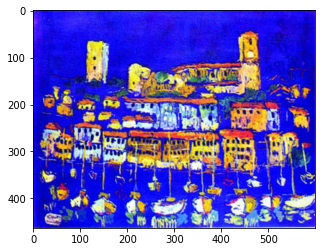

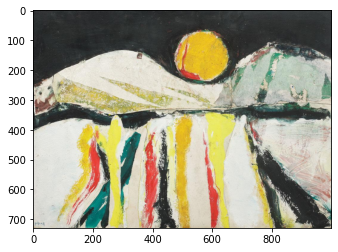

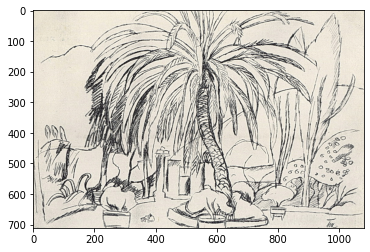

In [ ]:
#select 3 styles



kk = ['fikret-mualla-saygi_cannes.jpg', 'ion-pacea_midnight-sun.jpg', 'pyotr-konchalovsky_spanish-landscape-palm-1910.jpg']

styles = {}
for k in kk:
  img = cv2.imread(os.path.join(style_path,'Fauvism',k))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  styles[k] = img
  plt.imshow(img)
  plt.show()

In [ ]:
import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [ ]:
for dataset in samples.keys():
  print(dataset)
  for en, (img, label) in enumerate(samples[dataset]):
    print(en)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    path1 = join(save_path, dataset, "original")
    if not os.path.exists(path1):
      os.makedirs(path1)
    p1 = join(path1, str(en) + ".jpg")
    cv2.imwrite(p1, img)
    for style_key in styles:
      print(style_key)
      style = styles[style_key]
      path2 = join(save_path, "Style")
      if not os.path.exists(path2):
        os.makedirs(path2)
      # p2 = join(path2, style_key + ".jpg")
      p2 = join(path2, style_key)

      # cv2.imwrite(p2, style)
      cv2.imwrite(p2, cv2.cvtColor(style, cv2.COLOR_BGR2RGB))
      
      path3 = join(save_path, dataset, "transformed")
      if not os.path.exists(path3):
        os.makedirs(path3)
      # output_path = join(path3, str(en) + "_" + style_key + ".jpg")
      output_path = join(path3, str(en) + "_" + style_key)
      #blockPrint()
      with HiddenPrints():
        transfer(p1, p2, output_path)
      #enablePrint()
      print("successfully")

RESISC_Micro
0
fikret-mualla-saygi_cannes.jpg
successfully
ion-pacea_midnight-sun.jpg
successfully
pyotr-konchalovsky_spanish-landscape-palm-1910.jpg
successfully
1
fikret-mualla-saygi_cannes.jpg
successfully
ion-pacea_midnight-sun.jpg
successfully
pyotr-konchalovsky_spanish-landscape-palm-1910.jpg
successfully
2
fikret-mualla-saygi_cannes.jpg
successfully
ion-pacea_midnight-sun.jpg
successfully
pyotr-konchalovsky_spanish-landscape-palm-1910.jpg
successfully
TEX_Micro
0
fikret-mualla-saygi_cannes.jpg
successfully
ion-pacea_midnight-sun.jpg
successfully
pyotr-konchalovsky_spanish-landscape-palm-1910.jpg
successfully
1
fikret-mualla-saygi_cannes.jpg
successfully
ion-pacea_midnight-sun.jpg
successfully
pyotr-konchalovsky_spanish-landscape-palm-1910.jpg
successfully
2
fikret-mualla-saygi_cannes.jpg
successfully
ion-pacea_midnight-sun.jpg
successfully
pyotr-konchalovsky_spanish-landscape-palm-1910.jpg
successfully
BCT_Micro
0
fikret-mualla-saygi_cannes.jpg
successfully
ion-pacea_midnight-su